### import all library

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### import dataset

In [19]:
df = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Medical%20Cost%20Insurance/medical_cost_insurance.csv')
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [20]:
df.shape

(1338, 7)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### EDA

In [22]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

We can see null value is not present in the dataset 

In [23]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

we can see the ratio of male and female

In [25]:
df.dtypes 

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [26]:
for i in df.columns:
    print(df[i].value_counts())

age
18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: count, dtype: int64
sex
male      676
female    662
Name: count, dtype: int64
bmi
32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: count, Length: 548, dtype: int64
children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64
smoker
no     1064
yes     274
Name: count, dtype: int64
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64
charges
1639.56310     2
16884.92400    1
29330.98315   

In [27]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [29]:
# Separating Categorical Columns
categorical_columns = [col for col in df.columns if df[col].dtype == "object"]
print("Categorical columns:", categorical_columns)

# Separating Numerical Columns
numerical_columns = [col for col in df.columns if df[col].dtype != "object"]
print("Numerical columns:", numerical_columns)

Categorical columns: ['sex', 'smoker', 'region']
Numerical columns: ['age', 'bmi', 'children', 'charges']


(sex, smoker and region) -->  are catogerical columns

(age, bmi, children and charges) -->  are numerical columns.

In [30]:
df.nunique().to_frame("No of unique values")

,No of unique values
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


### Description of Dataset


In [34]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


This gives the statistical information of the numerical columns. The summary of the dataset looks perfect since there is no negative/invalid values present

From the above description we can observe :

The counts of all the columns are same which means there are no missing values in the dataset.

The Mean is greater than meadian(50%) it mean the data is left skewed in charges column

and the max values is higher than 75% in age bmi children and there is huge difference in charges

### Visualizing catogerical data

<function matplotlib.pyplot.show(close=None, block=None)>

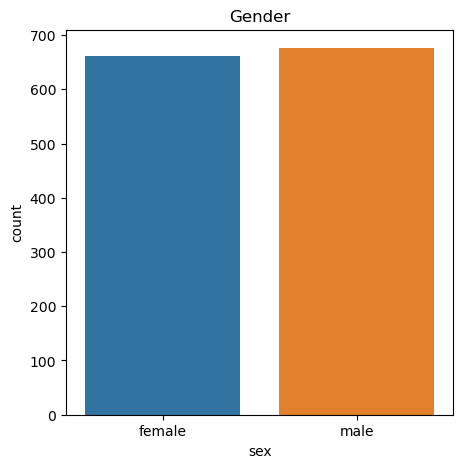

In [38]:
plt.figure(figsize=(5,5))
sns.countplot(x="sex", data=df)
plt.title("Gender")
plt.show

As we can see above almost male and female booth in equal in data

<function matplotlib.pyplot.show(close=None, block=None)>

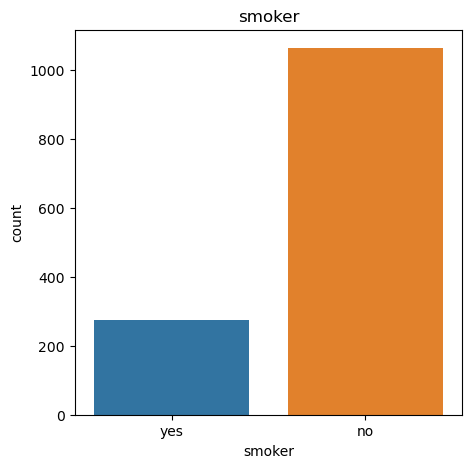

In [41]:
plt.figure(figsize=(5,5))
sns.countplot(x="smoker", data=df)
plt.title("smoker")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

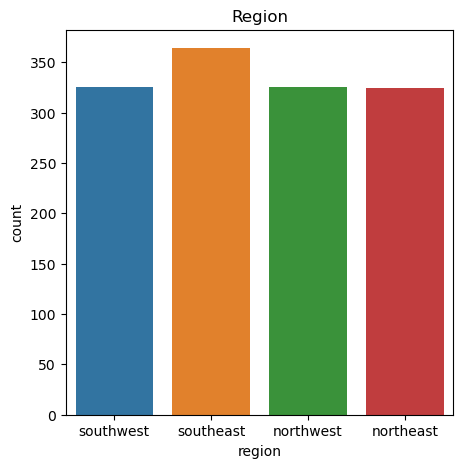

In [44]:
plt.figure(figsize=(5,5))
sns.countplot(x="region", data=df)
plt.title("Region")
plt.show

there is higher numbers of peoples in southeast then others regiuons and rest of the reason are almost equal numbers of people

<function matplotlib.pyplot.show(close=None, block=None)>

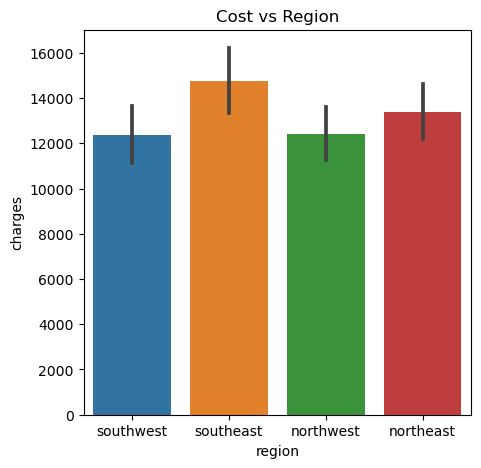

In [45]:
plt.figure(figsize=(5,5))
sns.barplot(x="region",y="charges", data=df)
plt.title("Cost vs Region")
plt.show

The people living in southeast have higher medical chareges comared to others

In [47]:
df["smoker"].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

There is less number of yes smokers than the no smokers

<function matplotlib.pyplot.show(close=None, block=None)>

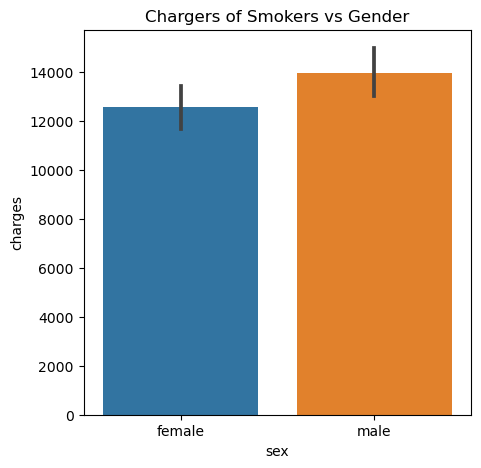

In [48]:
plt.figure(figsize=(5,5))
sns.barplot(x="sex",y="charges", data=df)
plt.title("Chargers of Smokers vs Gender")
plt.show

Male have higher charges than females

<function matplotlib.pyplot.show(close=None, block=None)>

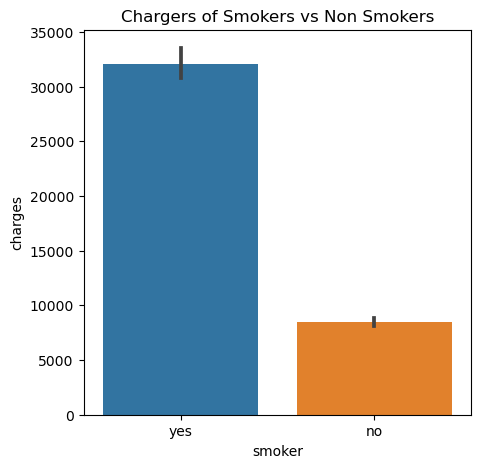

In [52]:
plt.figure(figsize=(5,5))
sns.barplot(x="smoker",y="charges", data=df)
plt.title("Chargers of Smokers vs Non Smokers")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

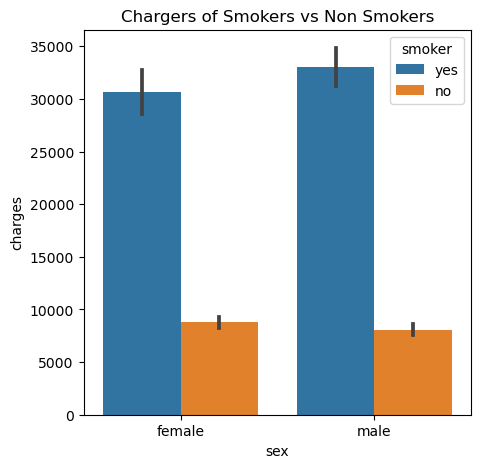

In [53]:
plt.figure(figsize=(5,5))
sns.barplot(x="sex",y="charges",hue="smoker", data=df)
plt.title("Chargers of Smokers vs Non Smokers")
plt.show

Male who are smokers are higer charges than the females who are smokers but males who is not smokers have lower chages than the female who are not smokers

<function matplotlib.pyplot.show(close=None, block=None)>

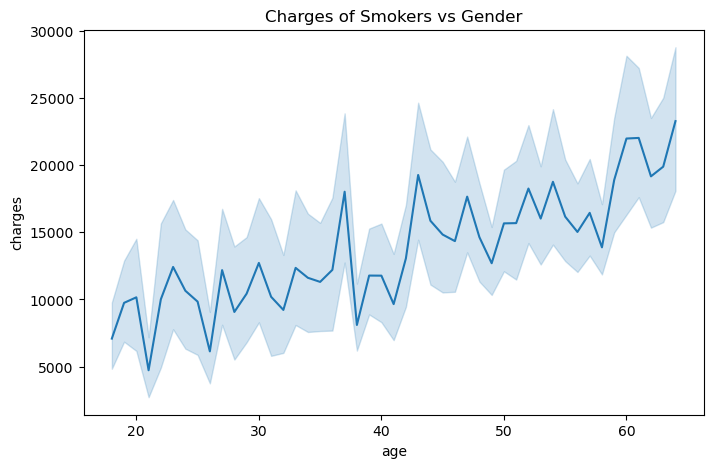

In [59]:
plt.figure(figsize=(8,5))
sns.lineplot(x="age",y="charges", data=df)
plt.title("Charges of Smokers vs Gender")
plt.show

As the age is increasing the charges is also increasing

### Visualizing Numerical data

In [60]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


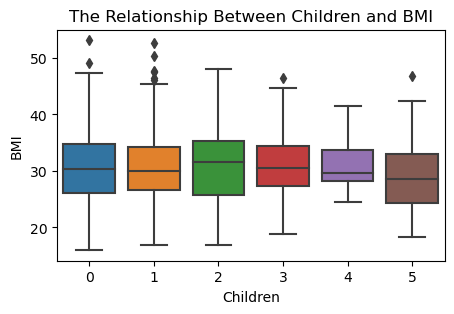

In [61]:
plt.figure(figsize=(5,3))
sns.boxplot(x="children", y="bmi", data=df)
plt.title("The Relationship Between Children and BMI")
plt.xlabel("Children")
plt.ylabel("BMI")
plt.show()

children who is 2 years old have more bmi than others

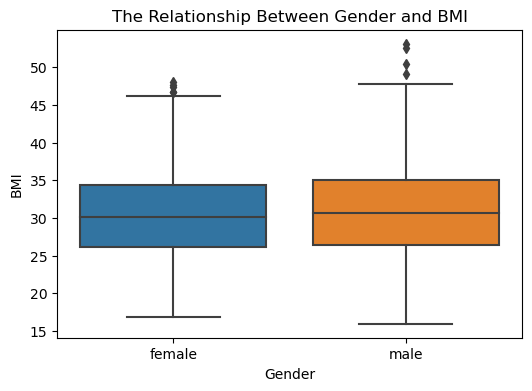

In [62]:
plt.figure(figsize=(6,4))
sns.boxplot(x="sex", y="bmi", data=df)
plt.title("The Relationship Between Gender and BMI")
plt.xlabel("Gender")
plt.ylabel("BMI")
plt.show()

Gender male have more bmi

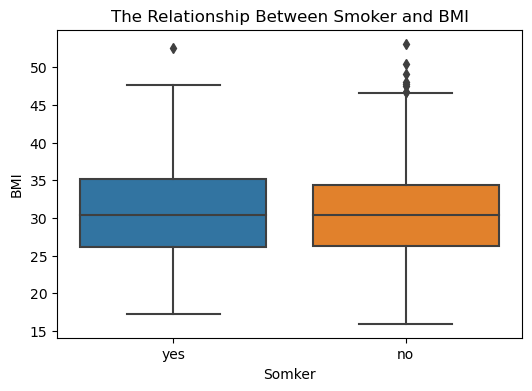

In [66]:
plt.figure(figsize=(6,4))
sns.boxplot(x="smoker", y="bmi", data=df)
plt.title("The Relationship Between Smoker and BMI")
plt.xlabel("Somker")
plt.ylabel("BMI")
plt.show()

Smokers have more bmi

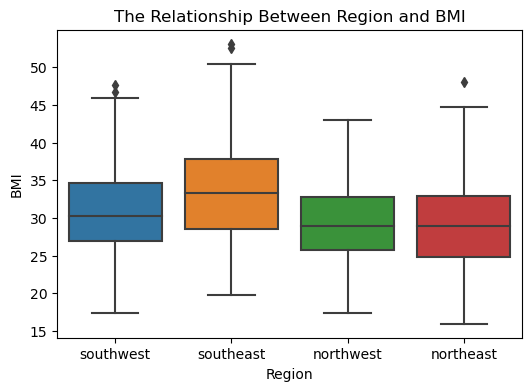

In [67]:
plt.figure(figsize=(6,4))
sns.boxplot(x="region", y="bmi", data=df)
plt.title("The Relationship Between Region and BMI")
plt.xlabel("Region")
plt.ylabel("BMI")
plt.show()

Southeast people have more bmi

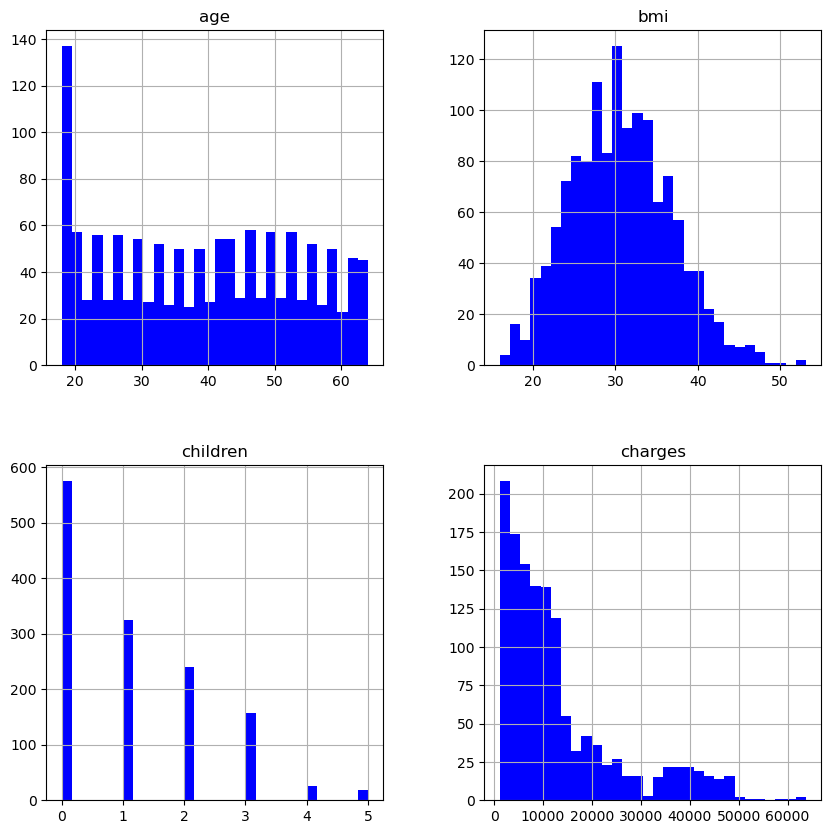

In [68]:
df[numerical_columns].hist(bins=30, figsize=(10,10),color="blue")
plt.show()

In age columns there is more number of peoples are in age group of betweeen 10 and 20.

In bmi there is more people in age group of 25 to 35.

In children column there are more number of people who dont't have any childre and there are few people have have more than 4-5 childrens.

In charges columns there are more people whose charges is 10000 and very fev have more than 50000 to 60000

### Checking outliers

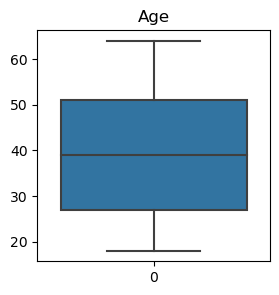

In [71]:
plt.figure(figsize=(3,3))
sns.boxplot(df['age'])
plt.title("Age")
plt.show()

there is no outliers

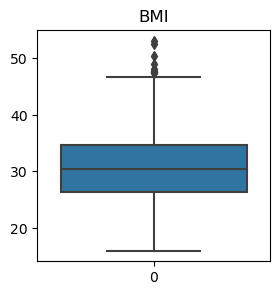

In [76]:
plt.figure(figsize=(3,3))
sns.boxplot(df['bmi'])
plt.title("BMI")
plt.show()

There are some outliers in bmi column

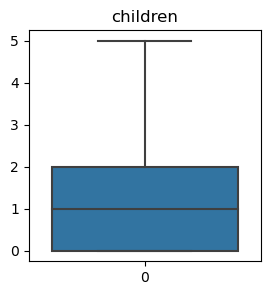

In [77]:
plt.figure(figsize=(3,3))
sns.boxplot(df['children'])
plt.title("children")
plt.show()

there is no outliers

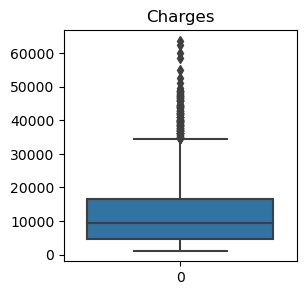

In [78]:
plt.figure(figsize=(3,3))
sns.boxplot(df['charges'])
plt.title("Charges")
plt.show()

<Axes: >

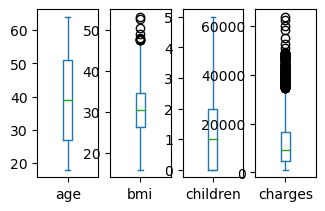

In [86]:
df.plot(kind='box',subplots=True,layout=(2,7))
sns.boxplot(notch=True, showcaps=False)

There are some outliers in bmi and charges columns

### Removing Outliers

In [87]:
from scipy.stats import zscore
z=np.abs(zscore(df[numerical_columns]))

In [88]:
#threshold from zscore values__________> above 3 are consider outlier
threshold=3
print(np.where(z>3))

(array([  32,   34,   71,  116,  166,  413,  425,  438,  543,  568,  577,
        640,  819,  847,  877,  932,  937,  969,  984, 1047, 1085, 1116,
       1130, 1146, 1230, 1245, 1272, 1300, 1317], dtype=int64), array([2, 3, 2, 1, 2, 2, 2, 2, 3, 2, 3, 2, 3, 1, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 3, 3, 2, 2, 3, 1], dtype=int64))


In [89]:
new_df=df[(z<3).all(axis=1)]  #removing outliers

age            Axes(0.125,0.53;0.0945122x0.35)
bmi         Axes(0.238415,0.53;0.0945122x0.35)
children    Axes(0.351829,0.53;0.0945122x0.35)
charges     Axes(0.465244,0.53;0.0945122x0.35)
dtype: object

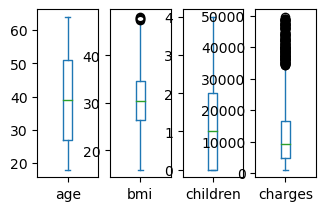

In [90]:
new_df.plot(kind='box',subplots=True,layout=(2,7))

In [95]:
new_df.shape

(1309, 7)

In [96]:
df.shape

(1338, 7)

In [98]:
#Removing skewness using cuberoot method
new_df["children"]=np.cbrt(new_df["children"])

In [100]:
new_df["bmi"]=np.cbrt(new_df["bmi"])

### Convert catogerical values in numerical values

In [102]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Encode using Label encoder beause it have more than 2 catogerical values in region column

In [103]:
from sklearn.preprocessing import LabelEncoder

In [106]:
le = LabelEncoder()
list1=['sex','smoker','region']     
for val in list1:
    new_df[val]=le.fit_transform(new_df[val].astype(str))
    
new_df

,age,sex,bmi,children,smoker,region,charges
0,19,0,3.032970,0.00000,1,3,16884.92400
1,18,1,3.232290,1.00000,0,2,1725.55230
2,28,1,3.207534,1.44225,0,2,4449.46200
3,33,1,2.831656,0.00000,0,1,21984.47061
4,32,1,3.068073,0.00000,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,3.140367,1.44225,0,1,10600.54830
1334,18,0,3.172154,0.00000,0,0,2205.98080
1335,18,0,3.327713,0.00000,0,2,1629.83350
1336,21,0,2.954880,0.00000,0,3,2007.94500


In [121]:
new_df.skew()

age         0.051340
sex        -0.010708
bmi        -0.137686
children   -0.101389
smoker      1.482731
region     -0.023027
charges     1.437160
dtype: float64

In [114]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1309 non-null   int64  
 1   sex       1309 non-null   int32  
 2   bmi       1309 non-null   float64
 3   children  1309 non-null   float64
 4   smoker    1309 non-null   int32  
 5   region    1309 non-null   int32  
 6   charges   1309 non-null   float64
dtypes: float64(3), int32(3), int64(1)
memory usage: 66.5 KB


In [115]:
new_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,3.032970,0.00000,1,3,16884.92400
1,18,1,3.232290,1.00000,0,2,1725.55230
2,28,1,3.207534,1.44225,0,2,4449.46200
3,33,1,2.831656,0.00000,0,1,21984.47061
4,32,1,3.068073,0.00000,0,1,3866.85520


In [116]:
new_df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.019253,0.121578,0.059031,-0.029090,0.003121,0.305263
sex,-0.019253,1.000000,0.042854,0.014302,0.079058,0.003084,0.059455
bmi,0.121578,0.042854,1.000000,0.025584,-0.006648,0.161741,0.192632
children,0.059031,0.014302,0.025584,1.000000,0.022694,0.005582,0.091228
smoker,-0.029090,0.079058,-0.006648,0.022694,1.000000,-0.003474,0.785129
region,0.003121,0.003084,0.161741,0.005582,-0.003474,1.000000,-0.007633
charges,0.305263,0.059455,0.192632,0.091228,0.785129,-0.007633,1.000000


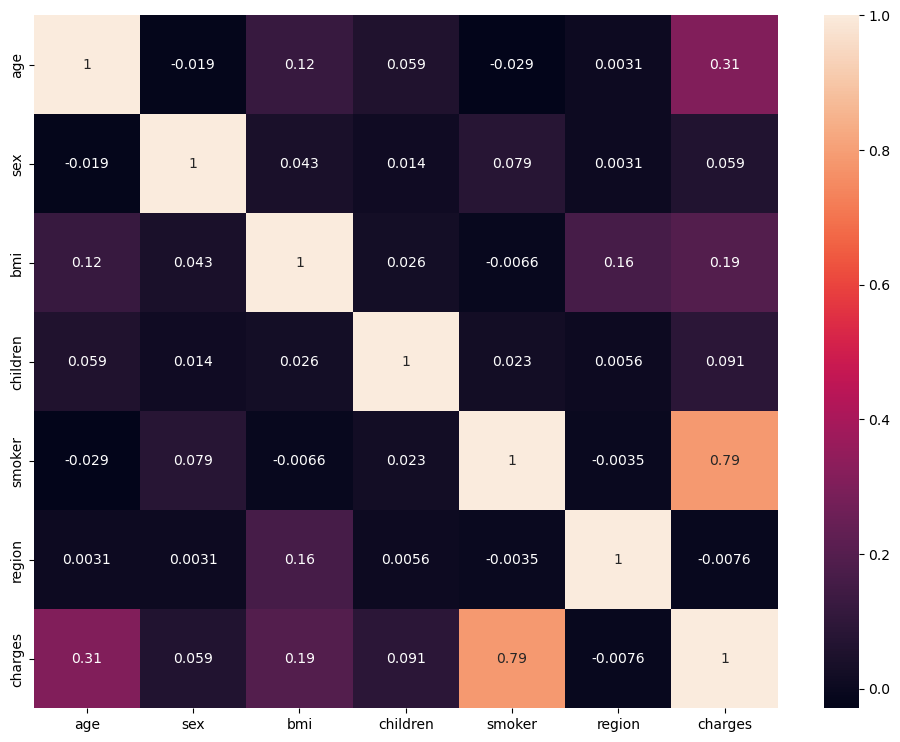

In [117]:
plt.figure(figsize=(12,9))
sns.heatmap(new_df.corr(),annot = True)
plt.show()

smoker have higher corelation to the target veriable that is charges and sex have very low corelation

### Feature Scaling

In [118]:
x=new_df.iloc[:,0:-1]
y=new_df.iloc[:,-1]

In [119]:
x.shape

(1309, 6)

In [120]:
y.shape

(1309,)

In [123]:
y.value_counts()

charges
1639.56310     2
16884.92400    1
13555.00490    1
10422.91665    1
7243.81360     1
              ..
28287.89766    1
1149.39590     1
37079.37200    1
4738.26820     1
29141.36030    1
Name: count, Length: 1308, dtype: int64

#### Import all libraries for modeling

In [128]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor,ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor

In [129]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42)

In [130]:
print("x_train shape:",x_train.shape,)
print("y_train shape:",y_train.shape)
print("x_test shape:",x_test.shape)
print("y_test.shape:",y_test.shape)

x_train shape: (916, 6)
y_train shape: (916,)
x_test shape: (393, 6)
y_test.shape: (393,)


#### Linear regression

In [131]:
LR= LinearRegression()
LR.fit(x_train, y_train)
pred_LR=LR.predict(x_test)
print(LR.score(x_train,y_train)*100)
print(r2_score(y_test,pred_LR)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pred_LR))
print('Mean squared error:',mean_squared_error(y_test,pred_LR))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_LR)))

74.360157697973
77.28698947620694
Mean absolute error: 4160.195273930486
Mean squared error: 32987539.9322848
Root mean squared error: 5743.478034456543


#### KNeighborsRegressor

In [132]:
KNN = KNeighborsRegressor()
KNN.fit(x_train, y_train)
pred_KNN = KNN.predict(x_test)
print('R2_score',r2_score(y_test,pred_KNN)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pred_KNN))
print('Mean squared error:',mean_squared_error(y_test,pred_KNN))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_KNN)))

R2_score 40.31610525184958
Mean absolute error: 5489.463812160306
Mean squared error: 86682690.48950812
Root mean squared error: 9310.353940077042


#### Ridge Regression

In [134]:
RR = Ridge(alpha=10)
RR.fit(x_train,y_train)
pred_RR = RR.predict(x_test)

print('R2_score',r2_score(y_test,pred_RR)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pred_RR))
print('Mean squared error:',mean_squared_error(y_test,pred_RR))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_RR)))

R2_score 76.62518852044738
Mean absolute error: 4222.971141783576
Mean squared error: 33948715.26535978
Root mean squared error: 5826.55260556015


#### Lasso Regression

In [135]:
L = Lasso(alpha=0.001)
L.fit(x_train,y_train)
pred_L = L.predict(x_test)
print('R2_score',r2_score(y_test,pred_L)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pred_L))
print('Mean squared error:',mean_squared_error(y_test,pred_L))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_L)))

R2_score 77.28698661726857
Mean absolute error: 4160.194564251699
Mean squared error: 32987544.084501583
Root mean squared error: 5743.4783959288625


#### Decision Tree Regression

In [136]:
DTR = DecisionTreeRegressor(max_depth=3)
DTR.fit(x_train,y_train)
pred_DTR = DTR.predict(x_test)
print('R2_score',r2_score(y_test,pred_DTR)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pred_DTR))
print('Mean squared error:',mean_squared_error(y_test,pred_DTR))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_DTR)))

R2_score 86.441829877576
Mean absolute error: 2665.1795555860713
Mean squared error: 19691386.91912523
Root mean squared error: 4437.497821872731


#### Support vector Regression

In [138]:
SV = SVR()
SV.fit(x_train, y_train)
pred_SVR = SV.predict(x_test)
print('R2_score',r2_score(y_test,pred_SVR)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pred_SVR))
print('Mean squared error:',mean_squared_error(y_test,pred_SVR))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_SVR)))

R2_score -12.267195970544641
Mean absolute error: 8443.118939826467
Mean squared error: 163052740.46716353
Root mean squared error: 12769.210643855928


#### RandomForestRegressor

In [141]:
RFR = RandomForestRegressor()
RFR.fit(x_train, y_train)
pred_RFR = RFR.predict(x_test)
print('R2_score',r2_score(y_test,pred_RFR)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pred_RFR))
print('Mean squared error:',mean_squared_error(y_test,pred_RFR))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_RFR)))

R2_score 86.59583595775311
Mean absolute error: 2431.544108384965
Mean squared error: 19467714.160538908
Root mean squared error: 4412.223267304014


#### Gradient Boosting Regressor

In [142]:
GBR = GradientBoostingRegressor(n_estimators=100)
GBR.fit(x_train,y_train)
pred_GBR = GBR.predict(x_test)
print('R2_score',r2_score(y_test,pred_GBR)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pred_GBR))
print('Mean squared error:',mean_squared_error(y_test,pred_GBR))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_GBR)))

R2_score 88.03418978792142
Mean absolute error: 2284.9427119901757
Mean squared error: 17378702.034219135
Root mean squared error: 4168.777042997039


#### Gradient Boosting Regressor gives max Accuracy

In [143]:
from sklearn.model_selection import cross_val_score
score= cross_val_score(GBR,x,y)
print("Cross-validation scores:", score)
print("Mean Cross-validation score:", np.mean(score))
print("Difference between R2 score and cross-validation:", (r2_score(y_test, pred_GBR) -score.mean() * 100))

Cross-validation scores: [0.8780829  0.80499516 0.88386545 0.84536659 0.86387169]
Mean Cross-validation score: 0.8552363587959102
Difference between R2 score and cross-validation: -84.6432939817118


In [144]:
from sklearn.model_selection import cross_val_score
score= cross_val_score(RFR,x,y)
print("Cross-validation scores:", score)
print("Mean Cross-validation score:", np.mean(score))
print("Difference between R2 score and cross-validation:", (r2_score(y_test, pred_RFR) -score.mean() * 100))

Cross-validation scores: [0.85474438 0.78119521 0.85580826 0.83487082 0.8490473 ]
Mean Cross-validation score: 0.8351331923517747
Difference between R2 score and cross-validation: -82.64736087559994


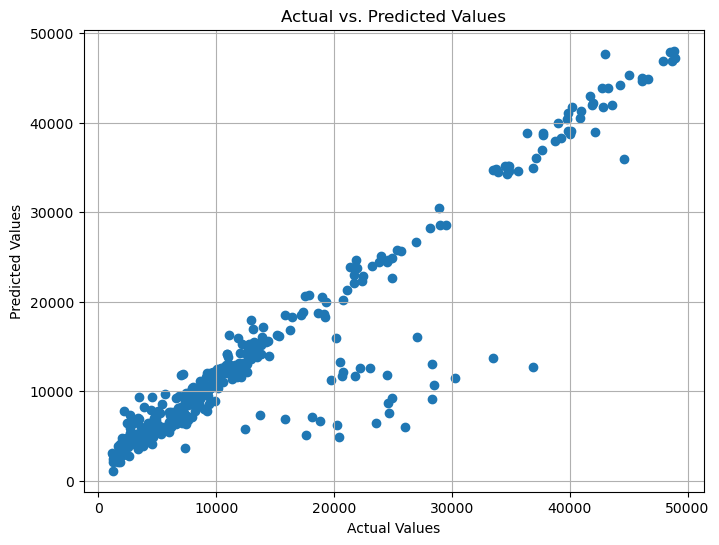

In [148]:
# Create a scatter plot to visualize actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, pred_GBR)
plt.title("Actual vs. Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid(True)
plt.show()

### Saving The best model

In [153]:
import joblib
# Save the model as a objectfile

joblib.dump(GBR,'Medical_cost_personal_insurance_project.pkl')

['Medical_cost_personal_insurance_project.pkl']

### prediction the save model

In [154]:
# lets load the saved model and get the predictions
model = joblib.load('Medical_cost_personal_insurance_project.pkl')

In [155]:
# prediction
prediction = model.predict(x_test)
prediction

array([16233.93313423, 14208.82828298, 35202.31548239,  7323.06674731,
        7138.29203609, 11828.30908589,  7166.6565033 , 25718.83088423,
       10610.30512599,  7225.54965649,  7707.05960961,  5962.76602563,
        2913.31928768, 15197.58861066, 12160.93375138, 12597.88034636,
       23881.06360719,  5695.97114315,  9924.87060793,  8183.1082252 ,
        6849.18741221, 38848.62034514, 10193.62416269, 18470.81929369,
        5398.61403835, 10144.48237408,  3519.85317183, 22109.27217725,
        4372.20768094,  8503.43483401, 12073.44819449,  5741.34913014,
       34649.85755259,  2635.9082029 ,  7272.34126044,  7583.91781268,
        6173.66429162,  8807.85674077,  6367.03311642,  7173.53236473,
       24390.75564439, 14540.40279877,  4402.1918886 , 11617.27241338,
        6460.11152805, 28221.85852338, 38916.88019624,  6004.15016681,
        1113.21762324, 11362.35617071,  6996.42667957, 17969.4593073 ,
        2443.78018005, 10311.38983969,  8115.22809758, 12871.32897841,
      

In [156]:
a = np.array(y_test)
df = pd.DataFrame()
df['Predicted'] =prediction
df['Original'] = a
df

,Predicted,Original
0,16233.933134,11093.62290
1,14208.828283,10928.84900
2,35202.315482,34472.84100
3,7323.066747,2680.94930
4,7138.292036,7537.16390
...,...,...
388,47880.240409,48517.56315
389,12512.942616,12233.82800
390,6623.212020,6196.44800
391,12069.038600,9447.38240


these are the values predicted vs original